# Hierarchical Clustering

### Data Mining Project 2024/25

Authors: Nicola Emmolo, Simone Marzeddu, Jacopo Raffi

TODO: 
- Usare silhouette per "validare" la tecnica di clustering;
- metodo MIN (Single);
- metodo MAX (Complete);
- metodo Average;
- metodo Ward.

In tutti i casi provare con e senza outlier

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from scipy.cluster.hierarchy import fcluster

In [3]:
dataset = pd.read_csv('../data/complete_dataset_fe.csv', dtype={'cyclist_team': str})
dataset['date'] = pd.to_datetime(dataset['date'], format='%Y-%m-%d')
# Select relevant columns for clustering
columns_to_use = ['length', 'race_prestige', 'race_physical_effort']
dataset = dataset[columns_to_use].drop_duplicates()

In [4]:
'''
Clustering Features Races:
- race_prestige (ignore: points, uci_points, startlist_quality)
- race_physical_effort (ignore: climb_total, profile, climb_percentage)
- lenght

Additionally, ignore race_year (not informative for clustering in our opinion)
'''


'''
Clustering Features Cyclists:
- cyclist_bmi (ignore: weight)
- height
- mean_delta
- cyclist_climb_power
'''

'\nClustering Features Cyclists:\n- cyclist_bmi (ignore: weight)\n- height\n- mean_delta\n- cyclist_climb_power\n'

### Races Clustering

In [5]:
data_for_clustering = dataset.dropna() #TODO: remove when we have imputed the missing values

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)

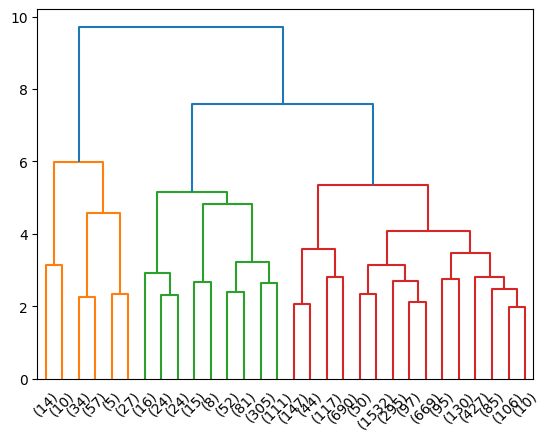

In [6]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

In [9]:
cluster_labels = fcluster(data_link, t=6, criterion='distance')
silhouette_score(data_scaled, cluster_labels)

np.float64(0.4075674610356258)

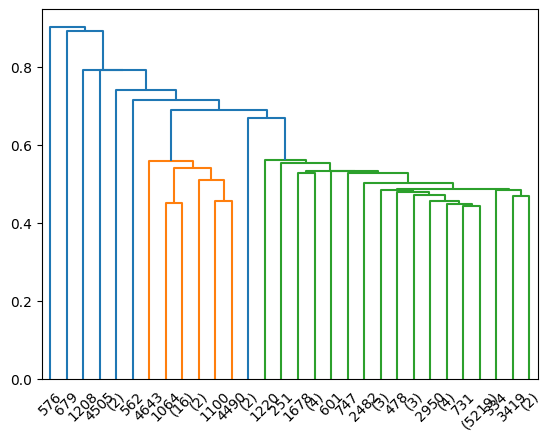

In [30]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

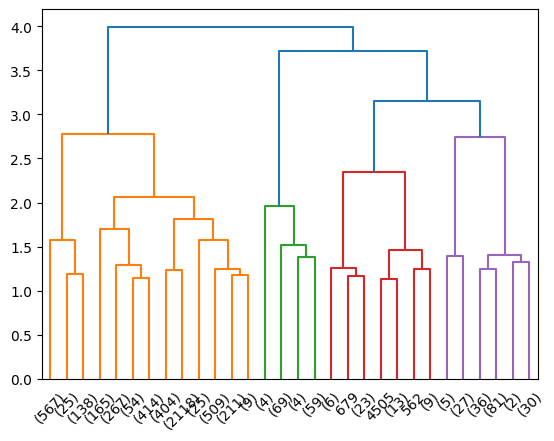

In [35]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

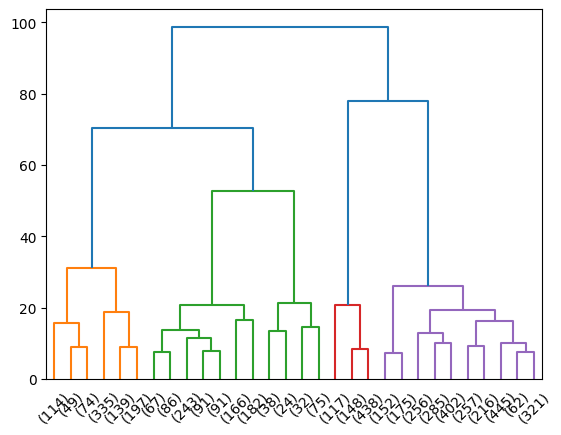

In [10]:
data_dist = pdist(data_scaled, metric='euclidean')
data_link = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link, truncate_mode='lastp')

### Cyclist Clustering

## TODO: Sottostante codice modello per ulteriori analisi

In [11]:
# Cluster Labels extraction
cluster_labels = fcluster(data_link, t=4, criterion='distance')

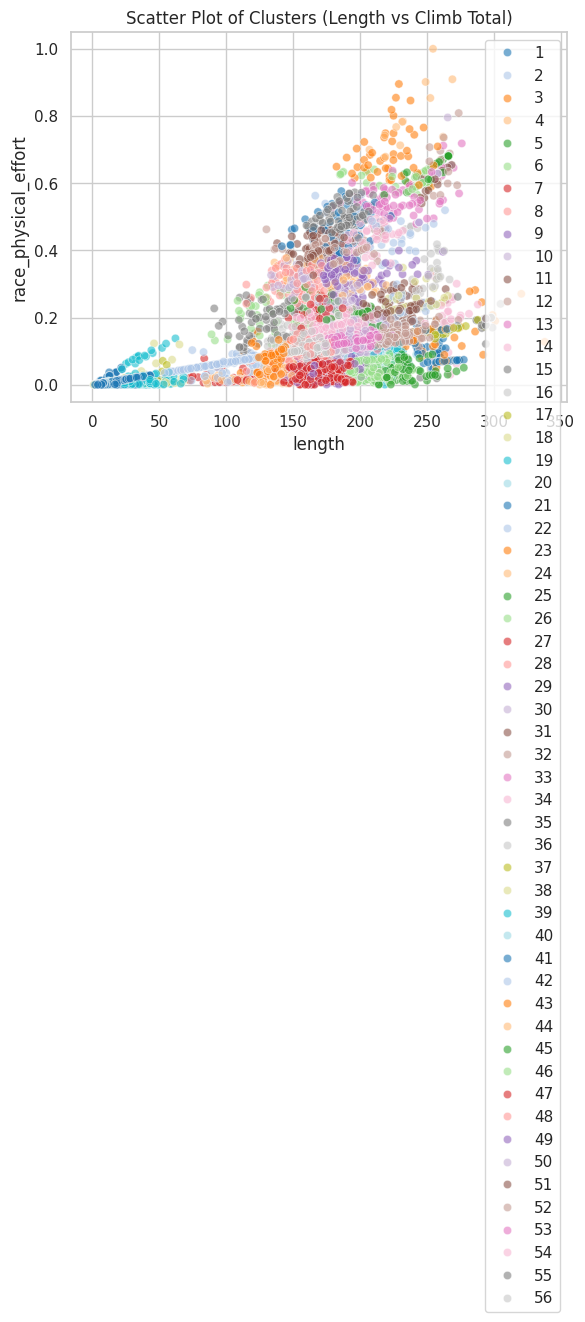

In [ ]:
# Scatter plot of a few features to visualize clusters
sns.scatterplot(
    x='length', y='race_physical_effort', hue=cluster_labels, palette='tab20',
    data=data_for_clustering, legend='full', alpha=0.6
)
plt.title("Scatter Plot of Clusters (Length vs Climb Total)")
plt.show()

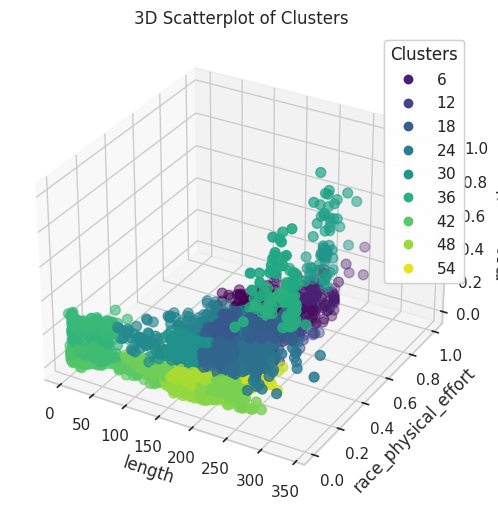

In [13]:
x = data_for_clustering['length']  # Prima feature
y = data_for_clustering['race_physical_effort']  # Seconda feature
z = data_for_clustering['race_prestige']  # Terza feature

# Crea il grafico 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot
scatter = ax.scatter(x, y, z, c=cluster_labels, cmap='viridis', s=50)
ax.set_xlabel('length')
ax.set_ylabel('race_physical_effort')
ax.set_zlabel('race_prestige')

# Aggiungi una legenda (opzionale)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.title('3D Scatterplot of Clusters')

# Abilita la modalità interattiva
plt.ion()
plt.show()